In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.decomposition import PCA

<AxesSubplot:>

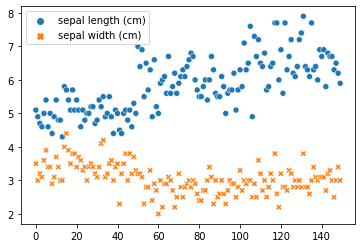

In [7]:
# Sepal Length vs Sepal Width
iris_df = datasets.load_iris(as_frame=True).frame

sepal_data = iris_df[['sepal length (cm)', 'sepal width (cm)']]
sns.scatterplot(data=sepal_data)


<AxesSubplot:>

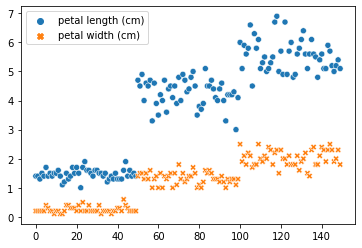

In [8]:
# Petal Length vs Petal Width
petal_data = iris_df[['petal length (cm)', 'petal width (cm)']]
sns.scatterplot(data=petal_data)

## Principal Components Analysis (PCA)
Followed example from [scikit-learn.org](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html?highlight=iris)

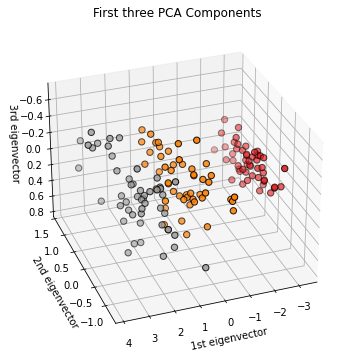

In [9]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

X_reduced = PCA(n_components=3).fit_transform(iris.data)

fig = plt.figure(1, figsize=(8,6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=y,
    cmap=plt.cm.Set1,
    edgecolor='k',
    s=40,
)

ax.set_title("First three PCA Components")
ax.set_xlabel("1st eigenvector")
ax.set_ylabel("2nd eigenvector")
ax.set_zlabel("3rd eigenvector")

plt.show()


## Multidimensional Scaling (MDS)

## t-Distributed Stochastic Neighbor Embedding (t-SNE)